In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
df = pd.read_csv("admit.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [2]:
df.shape

(400, 4)

In [3]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


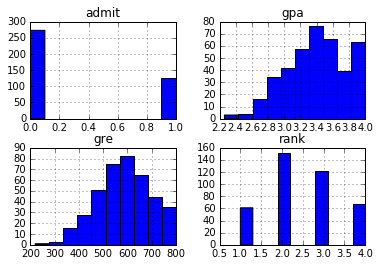

In [4]:
import pylab as pl
df.hist()
pl.show()

In [5]:
# dummify rank
dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')
print dummy_ranks.head()

   rank_1  rank_2  rank_3  rank_4
0     0.0     0.0     1.0     0.0
1     0.0     0.0     1.0     0.0
2     1.0     0.0     0.0     0.0
3     0.0     0.0     0.0     1.0
4     0.0     0.0     0.0     1.0


In [6]:
# add dummy variables
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'rank_2':])
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0.0,1.0,0.0
1,1,660,3.67,0.0,1.0,0.0
2,1,800,4.00,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,1.0


In [7]:
# define x and y
X=data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y=data['admit']

In [8]:
# split to training/test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# manually add the intercept
X_train = sm.add_constant(X_train)

In [10]:
logit = sm.Logit(y_train, X_train)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.561268
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jul 2017   Pseudo R-squ.:                 0.09631
Time:                        10:06:58   Log-Likelihood:                -179.61
converged:                       True   LL-Null:                       -198.75
                                        LLR p-value:                 3.309e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.1309      1.325     -3.117      0.002        -6.729    -1.533
gre            0.0016      0.

In [11]:
# odds ratios: how a 1 unit increase or decrease in a variable affects the odds of being admitted. 
#For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2.
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

            2.5%     97.5%        OR
const   0.001196  0.215864  0.016068
gre     0.999173  1.003996  1.001582
gpa     1.245460  5.576454  2.635385
rank_2  0.266262  1.046089  0.527763
rank_3  0.093460  0.436959  0.202085
rank_4  0.087667  0.527017  0.214947


In [13]:
# predict and auc score
X_test = sm.add_constant(X_test)
y_prob=result.predict(X_test)
y_pred=[1 if i>0.5 else 0 for i in y_prob]
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print auc(false_positive_rate, true_positive_rate)
print roc_auc_score(y_test, y_pred)

0.554507337526
0.554507337526
